# Fig17. Digital resources sorted by publishing date, with cumulative curve

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import matplotlib as mpl

plt.style.use('seaborn-muted')

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.fillna(0)
    
    
    return filtered_df

#### Define projects data path

In [2]:
file_path = "data/mapeo_recursos.csv"

#### Define function to clean projects data

In [3]:
def prepare_data(data):
    data = read_csv(file_path)
    data.drop_duplicates(subset ="ID recurso", keep = "first", inplace = True)
    data["Año de publicación"] = pd.to_numeric(data["Año de publicación"], errors='coerce')
    mini = data[["ID recurso","Año de publicación"]]
    mini.columns = ["id_res", "year"]
    grp = mini.groupby(pd.cut(mini["year"], np.arange(mini['year'].min()-1, 1+mini['year'].max(), 1))).agg({"id_res": ["count"]})
    grp["pcts"] = grp.apply(lambda x:100 * x / float(x.sum()))
    grp['cum_sum'] = grp['pcts'].cumsum()
    grp.reset_index(level=[0], inplace=True)
    grp.columns = grp.columns.droplevel(1)
    grp.columns = ["year","count","pcts","pcts_sum"]
    # display(grp)
    grp["year"] = grp.year.apply(lambda x: x.right)
    result = grp
    return result

#### Run program

In [4]:
proyectos = read_csv(file_path)
df2 = prepare_data(proyectos)

#### Print graph

<Figure size 432x288 with 0 Axes>

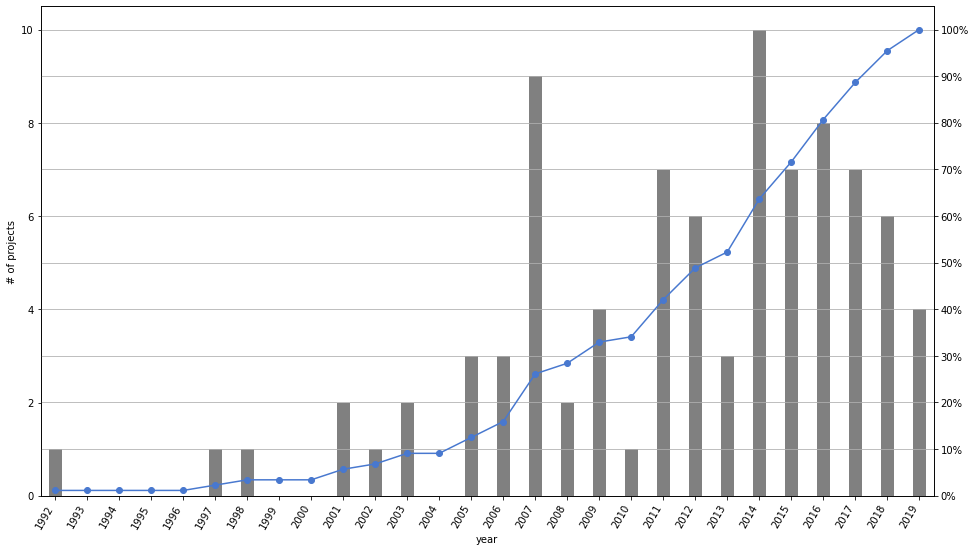

In [5]:
plt.figure()
ax1 = df2[['year', 'count']].plot(x='year', kind="bar", figsize=(16,9), legend=False, width=0.4, color="grey")
ax1.set_ylabel("# of projects")
ax2 = df2['pcts_sum'].plot(secondary_y=True, marker='o')
ax2.set_ylim(bottom=0)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10.00))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60, ha="right")
# plt.title("Number of research projects and total funding across the whole analysed period (1993-2019)",fontsize=20,fontweight="bold")
ax2.grid(axis="y")
#ax2.grid(axis="y")
plt.show()

In [6]:
df2

,year,count,pcts,pcts_sum
0,1992,1,1.136364,1.136364
1,1993,0,0.000000,1.136364
2,1994,0,0.000000,1.136364
3,1995,0,0.000000,1.136364
4,1996,0,0.000000,1.136364
5,1997,1,1.136364,2.272727
6,1998,1,1.136364,3.409091
7,1999,0,0.000000,3.409091
8,2000,0,0.000000,3.409091
9,2001,2,2.272727,5.681818
